In [2]:
# Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- Importing The Dataset

In [3]:
df = pd.read_csv('Mental Health Dataset.csv')

- Getting an idead about the dataset

In [4]:
df.head(2)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

1. Data Cleaning and Preprocessing:
- Identify and handle missing data, especially in the 'self_employed' column.

In [6]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


CONCLUSION :
- We have 5202 null values in self_employed column.
- Except self_employed column we don't have any column with null value.

In [7]:
# Getting unique values from self_employed
df['self_employed'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [8]:
# Calculating Mode of the self_employed column
mode_se = df['self_employed'].mode()[0]
mode_se

'No'

In [9]:
df['self_employed'].fillna(mode_se, inplace=True)

In [10]:
# Checking unique values again
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

- Checking for duplicates in dataset

In [11]:
df.duplicated().sum()

2313

- We have 2313 duplicate rows in our dataset and dropping them is the only option, beacuse redundant values can hinder further analysis of the data.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# Rechecking for duplicate values again
df.duplicated().sum()

0

- Standardizing the Listed columns

In [14]:
# Checking unique values in 'Days_Indoors', 'Growing_Stress', and 'Mood_Swings' to standardize them
unique_values = {
    'Days_Indoors': df['Days_Indoors'].unique(),
    'Growing_Stress': df['Growing_Stress'].unique(),
    'Mood_Swings': df['Mood_Swings'].unique()
}

unique_values

{'Days_Indoors': array(['1-14 days', 'Go out Every day', 'More than 2 months',
        '15-30 days', '31-60 days'], dtype=object),
 'Growing_Stress': array(['Yes', 'No', 'Maybe'], dtype=object),
 'Mood_Swings': array(['Medium', 'Low', 'High'], dtype=object)}

CONCLUSION :
- Values for Growing_Stress and Mood_Swings columns are already standardized.
- Only need to deal with Days_indoors column.

In [15]:
days_indoors_mapping = {'1-14 days':'1-14 days','15-30 days':'15-30 days','31-60 days':'31-60 days','More than 2 months':'61+ days',
                        'Go out Every day':'0 days'}

In [16]:
df['Days_Indoors'] = df['Days_Indoors'].map(days_indoors_mapping)

In [17]:
df['Days_Indoors'].unique()

array(['1-14 days', '0 days', '61+ days', '15-30 days', '31-60 days'],
      dtype=object)

CONCLUSION :
- Now we can say that our data is cleaned and ready for further analysis.

2. Descriptive Statistics:
- Calculate the frequency of responses for 'Gender', 'Country', 'Occupation', and 'Treatment'.
- Provide summary statistics for categorical variables to understand the central tendencies and variabilities.

In [18]:
# 1.) For 'Gender' column:
df['Gender'].value_counts(ascending=False)

,count
Gender,
Male,237900
Female,52151


In [19]:
# 2.) For 'Country' column:
df['Country'].value_counts(ascending=False)

,count
Country,
United States,169112
United Kingdom,51356
Canada,18699
Australia,6014
Netherlands,5891
Ireland,5542
Germany,4680
Sweden,2812
India,2771


In [20]:
# 3.) For 'Occupation' column:
df['Occupation'].value_counts(ascending=False)

,count
Occupation,
Housewife,65906
Student,61268
Corporate,60683
Others,52375
Business,49819


In [21]:
# 4.) For 'Treatment' column:
df['treatment'].value_counts(ascending=False)

,count
treatment,
Yes,146184
No,143867


CONCLUSION :

- Gender - The results here show that more than 80% data that has been recorded are of 'males'.
- Country - 'United States' has shown the most no. of mental health related cases which were - 169112.
- Occupation - Amongst all the recorder occupations, 'housewives' has been in the worst mental state, followed by 'Student' and 'Corporate'.
- Treatment - The data of those with some mental health issues has taken a treatment in comparison to those who hasn't taken a treatment is almost similar(146184 v/s 143867).

3. Visualization of Demographic Data:
- Create pie charts for 'Gender' and 'Country' to visualize the composition of the respondents.
- Use bar graphs to show the distribution of respondents by 'Occupation'.

In [22]:
# Getting Gender counts
gender_counts = df['Gender'].value_counts()
gender_counts

,count
Gender,
Male,237900
Female,52151


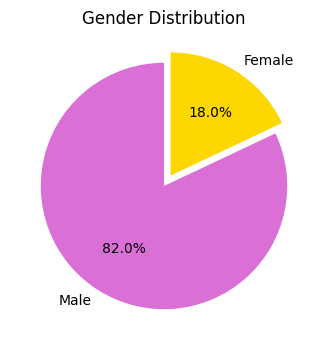

In [37]:
# Pei Chart For 'Gender' counts
plt.figure(figsize= (4, 4))
plt.pie(gender_counts, explode=[0, 0.10], labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['orchid', 'gold'])
plt.title('Gender Distribution')
plt.show()

CONCLUSION :
- Results are apparent 82% of males have mental health issues.
- While only 18% females suffer from mental health issues.

In [51]:
# Getting Country Counts
country_counts = df['Country'].value_counts()
country_counts

,count
Country,
United States,169112
United Kingdom,51356
Canada,18699
Australia,6014
Netherlands,5891
Ireland,5542
Germany,4680
Sweden,2812
India,2771


Getting too many countries let's take only the top 10.

In [52]:
country_counts_10 = country_counts.head(10)

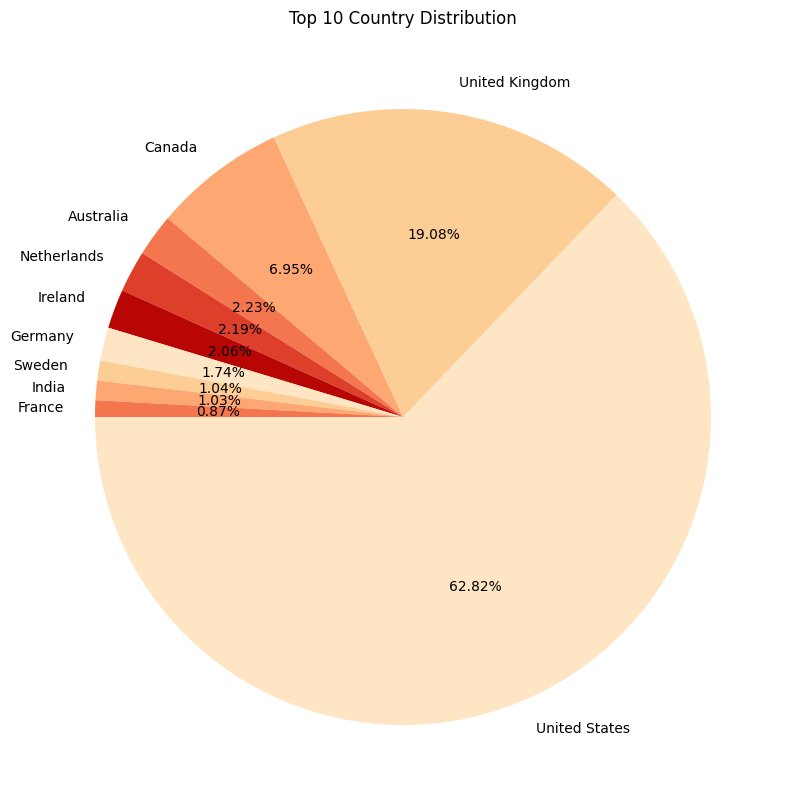

In [54]:
# Pie Chart for 'Country' counts only top 10
plt.figure(figsize= (10, 10))
plt.pie(country_counts_10, labels=country_counts_10.index, autopct='%1.2f%%', startangle=180, colors=sns.color_palette('OrRd'))
plt.title('Top 10 Country Distribution')
plt.show()

CONCLUSION :
- United States is leading where the residents have mental health issues.
- At the same time France, India, Sweden have least mental health related residents.

In [57]:
# Extract occupation counts
occupation_counts = df['Occupation'].value_counts()

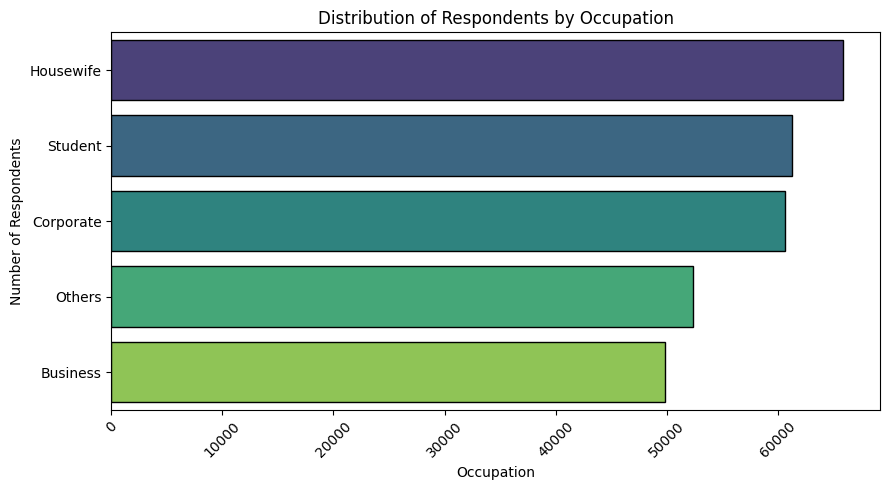

In [60]:
# Plotting the bar graph
plt.figure(figsize=(9, 5))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette='viridis', edgecolor='black')
plt.xlabel('Occupation')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CONCLUSION :
- Housewives Are The ones who seek help most in case of mental health problems.
- After them there are students, corporate workers and others.

4. Analysis of Mental Health History:
- Plot the distribution of 'Mental Health History' responses and analyze the proportions of each category.

In [61]:
df.head(1)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure


In [62]:
# Getting the value counts for 'Mental Health History'
mental_health_history_counts = df['Mental_Health_History'].value_counts()

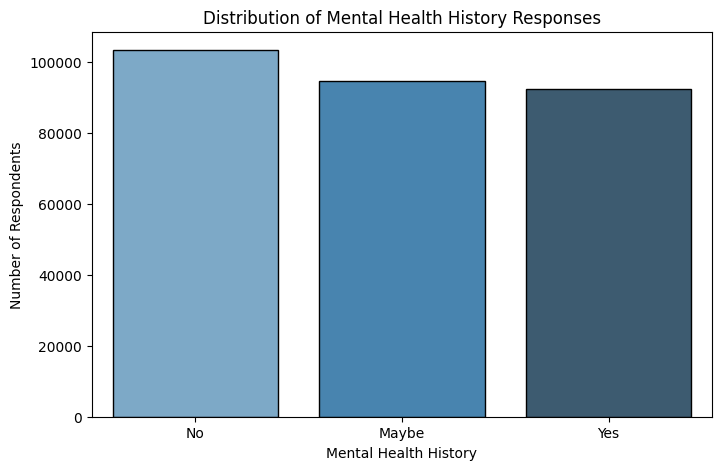

In [64]:
# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=mental_health_history_counts.index, y=mental_health_history_counts.values, palette='Blues_d', edgecolor='black')
plt.xlabel('Mental Health History')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Mental Health History Responses')
plt.show()

CONCLUSION :
- Mostly There are 'No' responses in mental healty history but it's not greater by much.
- 'Maybe' and 'Yes' are closely following it.

5. Correlation Analysis:
- Investigate the relationship between 'Family History' and 'Treatment'.
- Explore the correlation between 'Mood Swings' and 'Coping Struggles'.

In [67]:
# Creating a cross-tabulation between 'Family History' and 'Treatment'
family_treatment_crosstab = pd.crosstab(df['family_history'], df['treatment'])

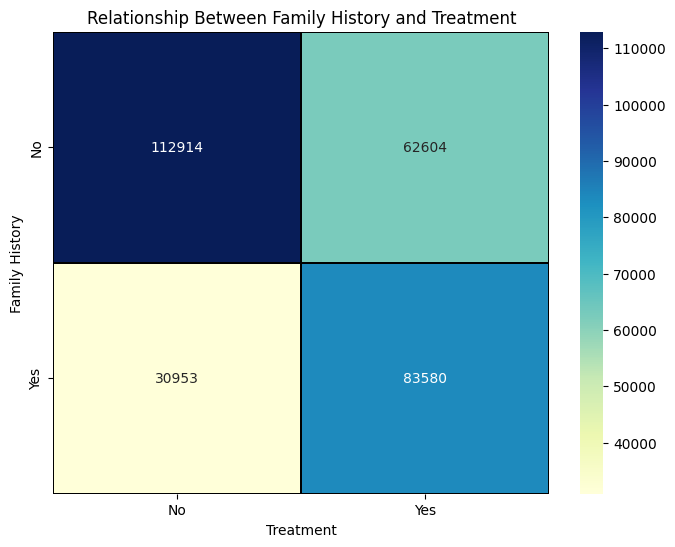

In [68]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(family_treatment_crosstab, annot=True, cmap='YlGnBu', fmt='d', linecolor='black', linewidths=0.2)
plt.title('Relationship Between Family History and Treatment')
plt.xlabel('Treatment')
plt.ylabel('Family History')
plt.show()

CONCLUSION :
- Family History Might Not Be a Strong Predictor: The relatively similar frequencies within each row suggest that family history might not be a strong predictor of whether someone receives treatment.
- Treatment Prevalence: The overall distribution of treatment (Yes vs. No) seems skewed, with a higher number of individuals receiving treatment regardless of family history.

6. Frequency of Days Indoors:
- Visualize the number of days respondents stayed indoors due to mental health issues using histograms or box plots.

In [70]:
df.head(1)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure


In [69]:
number_of_days_indoor = df['Days_Indoors'].value_counts()
number_of_days_indoor

,count
Days_Indoors,
1-14 days,63113
31-60 days,60058
0 days,57981
61+ days,55425
15-30 days,53474


In [ ]:
# Plotting Box Plot
plt.figure(figsize= (12, 6))
sns.boxplot(number_of_days_indoor, palette='Purples')
plt.title('')

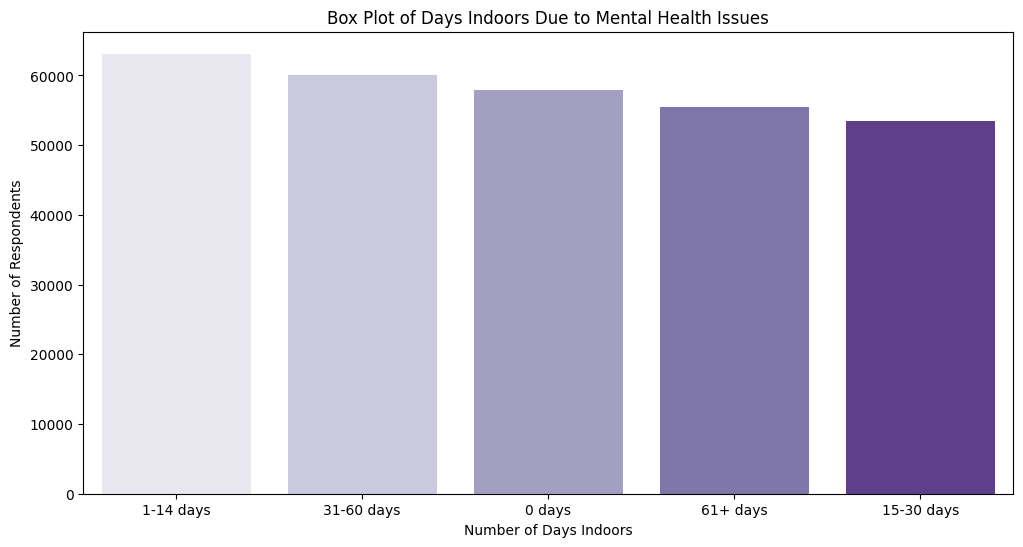

In [76]:
# Plotting a box plot to identify outliers in 'Days_Indoors'
plt.figure(figsize=(12, 6))
sns.barplot(x=number_of_days_indoor.index, y=number_of_days_indoor.values, palette='Purples')
plt.xlabel('Number of Days Indoors')
plt.ylabel('Number of Respondents')
plt.title('Box Plot of Days Indoors Due to Mental Health Issues')
plt.show()

CONCLUSION :
- 1-14 Indoor Days have max number of respondents.
- 15-30 Indoor Days have min number of respondents.
- 31-60 and 61+ Indoor Days have almost similar number of respondents.

7. Impact of Social Factors:
- Analyze the effects of 'Social Weakness' on 'Work Interest' and 'Coping Struggles' using cross-tabulations.

In [78]:
# Cross Tabulation Between 'Social Weakness' and "Work Interest"
cross_tabulation_analysis_1 = pd.crosstab(df['Social_Weakness'], df['Work_Interest'])
cross_tabulation_analysis_1

Work_Interest,Maybe,No,Yes
Social_Weakness,,,
Maybe,34473,35330,32774
No,34110,33137,29230
Yes,31801,36545,22651


CONCLUSION :
- Respondents who have Social Wekness Don't have much Work Interest.

In [80]:
# Cross Tabulation Between 'Social Weakness' and "Coping Struggles"
cross_tabulation_analysis_2 = pd.crosstab(df['Social_Weakness'], df['Coping_Struggles'])
cross_tabulation_analysis_2

Coping_Struggles,No,Yes
Social_Weakness,,
Maybe,56040,46537
No,50444,46033
Yes,46547,44450


CONCLUSION :
- Respondents who have no Social Weakness also Don't have much coping struggles.

8. Coping Mechanisms:
- Chart the frequency and types of 'Coping Struggles' faced by respondents and compare across different stress levels.

In [81]:
# Count the frequency of each type of coping struggle
coping_struggles_counts = df['Coping_Struggles'].value_counts()

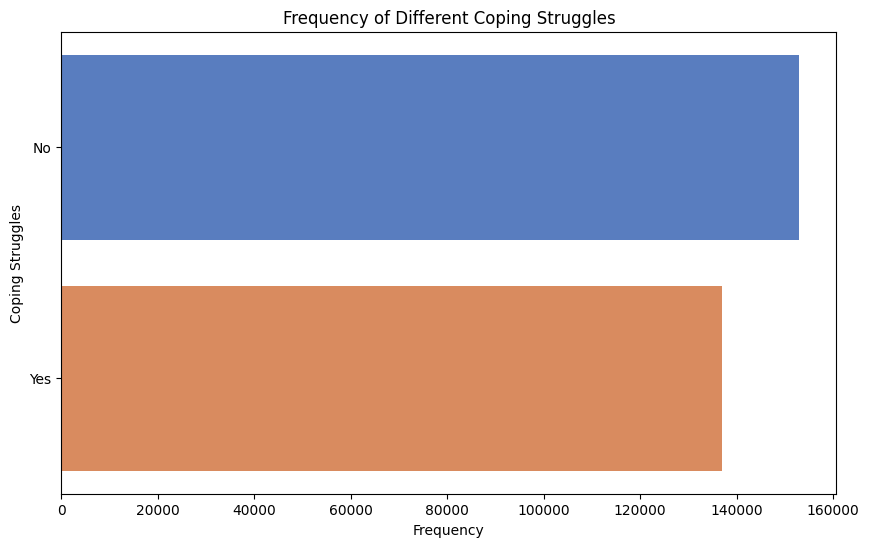

In [82]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=coping_struggles_counts.values, y=coping_struggles_counts.index, palette='muted')
plt.xlabel('Frequency')
plt.ylabel('Coping Struggles')
plt.title('Frequency of Different Coping Struggles')
plt.show()

CONCLUSION :
- Copping Struggles Respondents are high in 'No' category.

In [83]:
# Cross-tabulation of 'Coping Struggles' and 'Growing Stress'
coping_stress_crosstab = pd.crosstab(df['Coping_Struggles'], df['Growing_Stress'])

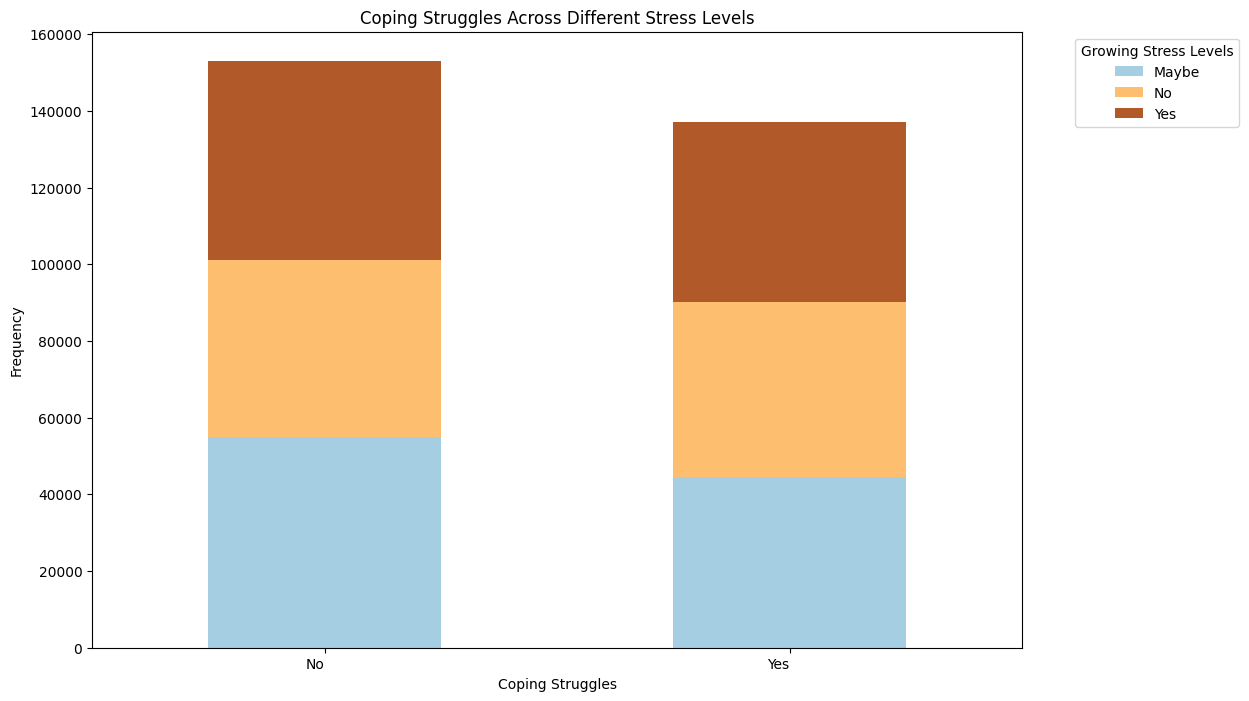

In [89]:
# Plotting the stacked bar chart
coping_stress_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Coping Struggles Across Different Stress Levels')
plt.xlabel('Coping Struggles')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Growing Stress Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


CONCLUSION :
- Distribution of Frequency of Copping Struggles is almost steady.

9. Awareness and Availability of Care Options:
- Assess the awareness of care options among respondents and visualize the data using bar graphs or stacked charts

In [91]:
# Count the frequency of responses in 'Awareness_of_Care_Options'
care_options_counts = df['care_options'].value_counts()

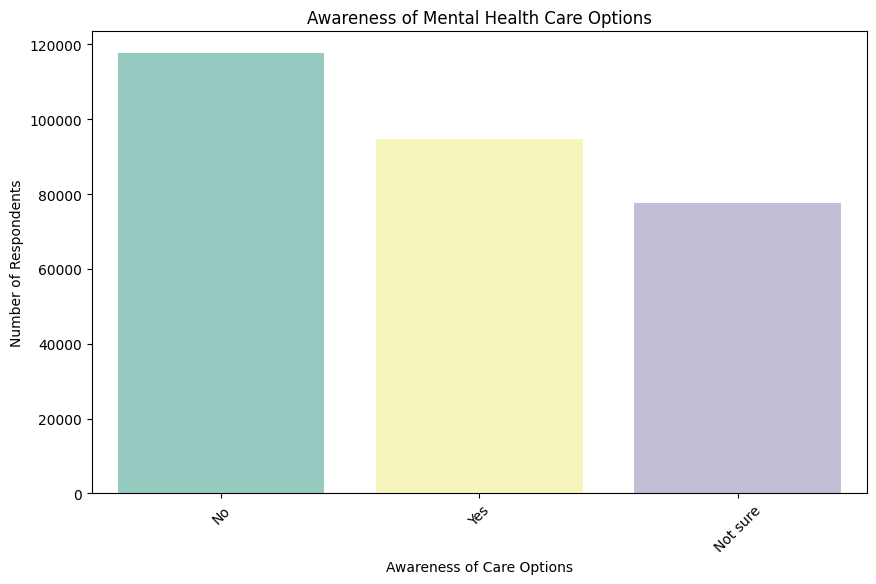

In [92]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=care_options_counts.index, y=care_options_counts.values, palette='Set3')
plt.xlabel('Awareness of Care Options')
plt.ylabel('Number of Respondents')
plt.title('Awareness of Mental Health Care Options')
plt.xticks(rotation=45)
plt.show()

CONCLUSION :
- High awareness of mental health care options: A significant majority of respondents (represented by the "Yes" bar) are aware of mental health care options.
- Awareness gap: While a considerable portion is aware, there's still a noticeable number of respondents who are unsure about the availability of mental health care options (represented by the "Not sure" bar).
- Importance of awareness campaigns: Further efforts to increase awareness about mental health care options are crucial to reach the remaining population who are currently unsure.

In [93]:
# Assuming there is a 'Country' column to compare awareness by country
care_country_crosstab = pd.crosstab(df['Country'], df['care_options'])

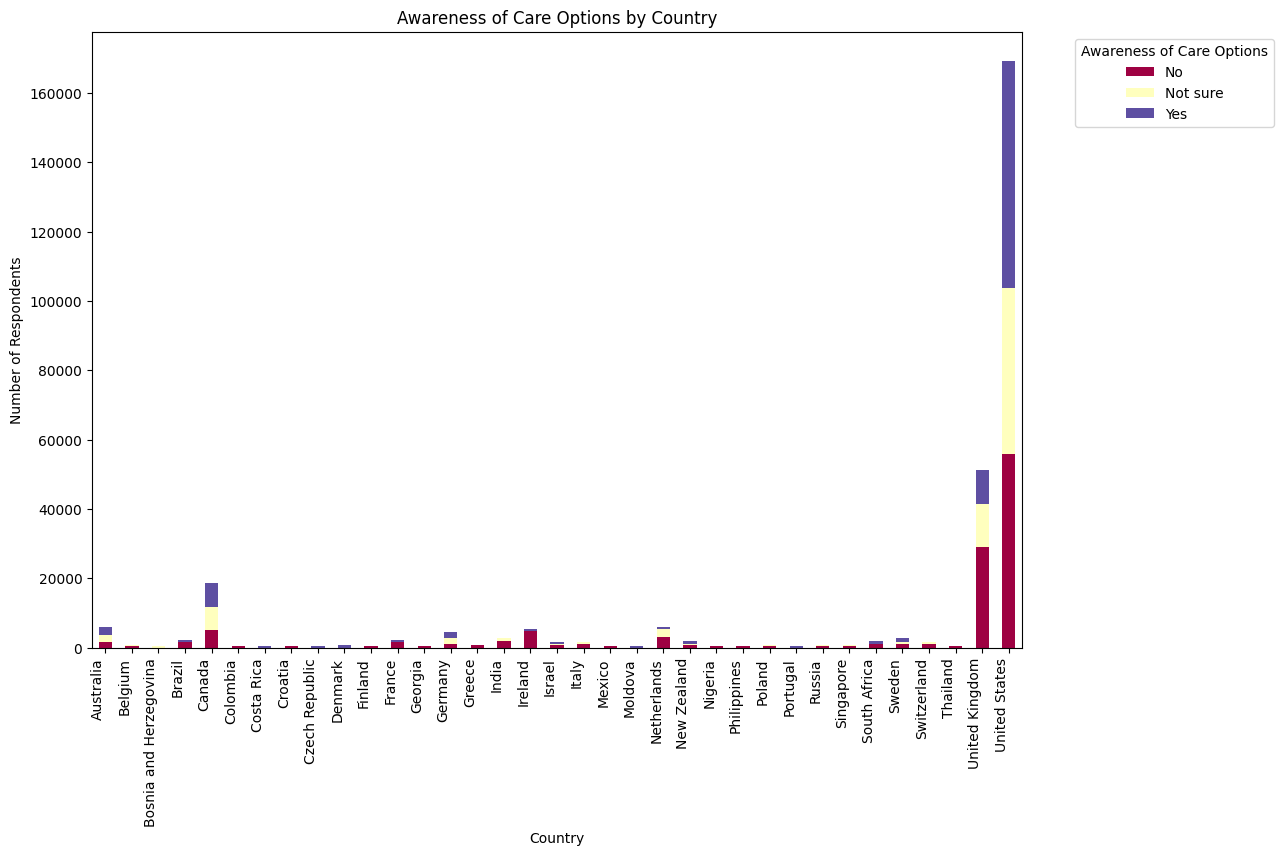

In [95]:
# Plotting the stacked bar chart
care_country_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Spectral')
plt.title('Awareness of Care Options by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Awareness of Care Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

CONCLUSION :
- High awareness of mental health care options: A significant majority of respondents (represented by the "Yes" bar) are aware of mental health care options.
- Awareness gap: While a considerable portion is aware, there's still a noticeable number of respondents who are unsure about the availability of mental health care options (represented by the "Not sure" bar).
- Importance of awareness campaigns: Further efforts to increase awareness about mental health care options are crucial to reach the remaining population who are currently unsure.

In [96]:
print('*'*180)

************************************************************************************************************************************************************************************


# **END OF REPORT**